**<h1><center>English Premier League Exploratory Data Analysis</center></h1>**

**Background**:

The English Premier League is the top level of competition in English football (Soccer). It is widely regarded as one of the most competitive and is one of the most watched sports competitions in the world. Each season typically lasts from mid-August to mid-May (with the exception of the 2019/2020 season, which was postponed for three months due to COVID-19). Each season 20 teams compete for the Premier League trophy, as well as for the top four spots. Then the top four teams will automatically be eligible for the next season of the Champions League (which is one of the most prestigious football tournaments not just in Europe but also in the world).


In the following sections, we will be performing Exploratory Data Analysis, Data Wrangling and Transformation and predictive Data Analysis for the 2021/2022 EPL Season. 


Original dataset used in this analysis can be acquired from the following link:  

https://datasetsearch.research.google.com/search?src=2&query=English%20Premier%20League&docid=L2cvMTFqY2t5XzZwNg%3D%3D

    
Dataset source credit:

https://www.football-data.co.uk/englandm.php.

https://www.premierleague.com/

        

**Key-words(Variables and Abbreviations) Definitions:**

This dataset is a collection of basic but crucial stats of the English Premier League 2020-21 season. The dataset has all the players that played in the EPL and their standard stats such as Goals, Assists, xG, xA, Passes Attempted, Pass Accuracy and more. Below is the descriptions of all the variables within the dataset.

* Position Each player has a certain position, in which he plays regularly. The position in this dataset are, FW - Forward, MF - Midfield, DF - Defensive, GK - Goalkeeper

* Starts	The number of times the player was named in the starting 11 by the manager.

* Mins	The number of minutes played by the player.

* Goals	The number of Goals scored by the player.

* Assists	The number of times the player has assisted other player in scoring the goal.

* Passes_Attempted	The number of passes attempted by the player.

* PercPassesCompleted	The number of passes that the player accurately passed to his teammate.

* xG	Expected number of goals from the player in a match.

* xA	Expected number of assists from the player in a match.

* Yellow_Cards	The players get a yellow card from the referee for indiscipline, technical fouls, or other minor fouls.

* Red Cards	The players get a red card for accumulating 2 yellow cards in a single game, or for a major foul.






**<h3>Data Cleaning and Wrangling</h3>**


    All steps of data cleaning and wrangling are done entirely in Python. Importing the required packages and libraries:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

**Importing dataset**

In [2]:
pd.set_option("display.max_columns", None) #Display all cols in the dataset
EPL_dataset = pd.read_csv("EPL_20_21.csv")



In [3]:
#Check the first 10 raws and all cols

EPL_dataset.head(10)

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0
5,César Azpilicueta,Chelsea,ESP,DF,30,26,24,2188,1,2,2015,87.5,0,0,0.03,0.11,5,1
6,N'Golo Kanté,Chelsea,FRA,MF,29,30,24,2146,0,2,1504,86.6,0,0,0.04,0.05,7,0
7,Jorginho,Chelsea,ITA,MF,28,28,23,2010,7,1,1739,89.5,7,9,0.31,0.09,2,0
8,Thiago Silva,Chelsea,BRA,DF,35,23,23,1935,2,0,1871,93.5,0,0,0.05,0.02,5,1
9,Kurt Zouma,Chelsea,FRA,DF,25,24,22,2029,5,0,1720,91.9,0,0,0.08,0.00,3,0


In [4]:
#Checking the dataset shape

EPL_dataset.shape

(532, 18)

It appears we have 532 different data points and 18 variables. Since some of the variables are not relevant to our data analysis, so, we will only be focusing on those that matter to us. 

In [5]:
#Check if there's any missing data
EPL_dataset.isnull().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

In [6]:
EPL_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [7]:
#It appears we don't have any missing data. Let's check the statistical description.

EPL_dataset.describe()



,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000


Lets' add 2 additional columns(Minutes played per match, and goals per match into our dataset) for further analysis.

In [8]:
EPL_dataset["MinutesPerMatch"] = (EPL_dataset['Mins']/ EPL_dataset["Matches"]).astype(int)

EPL_dataset["GoalsPerMatch"] = (EPL_dataset['Goals'] / EPL_dataset['Matches']).astype(float)


EPL_dataset.head() #Verify the newly created columns. 


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinutesPerMatch,GoalsPerMatch
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80,0.166667
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88,0.000000
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,84,0.111111
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,74,0.031250


**What are the overall gaols scored during the the season? and how many of the goals were penalty?** 

In [9]:

Total_Goals = EPL_dataset["Goals"].sum()

Total_PenaltyGoals = EPL_dataset["Penalty_Goals"].sum()

print("Total_Goals:", Total_Goals, "\n")
print("Total Penalty Goals:", Total_PenaltyGoals)


Total_Goals: 986 

Total Penalty Goals: 102


**Calculate how many penalties were given during the entire season?**

In [10]:
Total_PenaltyAttemped = EPL_dataset["Penalty_Attempted"].sum()

print("Total Penalties Attemped:", Total_PenaltyAttemped)

Total Penalties Attemped: 125


**Calculate the Penalty conversion rate for the season.**

In [11]:
Penalty_ConversionRate = (Total_PenaltyGoals/Total_PenaltyAttemped) * 100

print("Penalty Conversion Rate:", round(Penalty_ConversionRate),"%")

print("Penalty Missed Rate:", round(100 - Penalty_ConversionRate),"%" )


Penalty Conversion Rate: 82 %
Penalty Missed Rate: 18 %


**Visualize Penalty Conversion rate in a Pie chart**

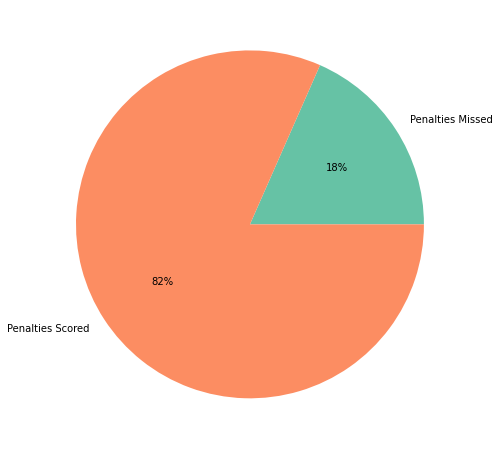

In [12]:
#Penalties Scored vs Missed

plt.figure(figsize = (13, 8))

Penalty_Missed = EPL_dataset["Penalty_Attempted"].sum() - Total_PenaltyGoals

Penalty_data = [Penalty_Missed, Total_PenaltyGoals]

#Let's create a labels 

labels = ["Penalties Missed", "Penalties Scored"]

color = sns.color_palette("Set2")

plt.pie(Penalty_data, labels= labels, colors = color, autopct= "%.0f%%")

plt.show()

**What are the unique positions available in the dataset?**

In [13]:
EPL_dataset["Position"].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

It appears some players played in more than one positions throughout the season.

**How many unique Nationalities are represented in EPL last season?**

In [14]:
Nations_represented = len(EPL_dataset["Nationality"].unique())

print(f"There were: {Nations_represented} different nationality's players playing throughout the season")

There were: 59 different nationality's players playing throughout the season


In [15]:
#We can also use the following method to achieve the same result.
np.size(EPL_dataset["Nationality"].unique())

59

**Determine countries with the most players in English Premier League and display it in bar chart**

In [16]:
#Let's use groupby to group players from the same country. 

Nationality = EPL_dataset.groupby("Nationality").size().sort_values(ascending= False)

Nationality.head(10) #Top 10 countries with most players in English Premier League

Nationality
ENG    192
FRA     31
BRA     27
ESP     26
IRL     21
POR     21
SCO     20
NED     16
WAL     12
BEL     11
dtype: int64

<AxesSubplot:xlabel='Nationality'>

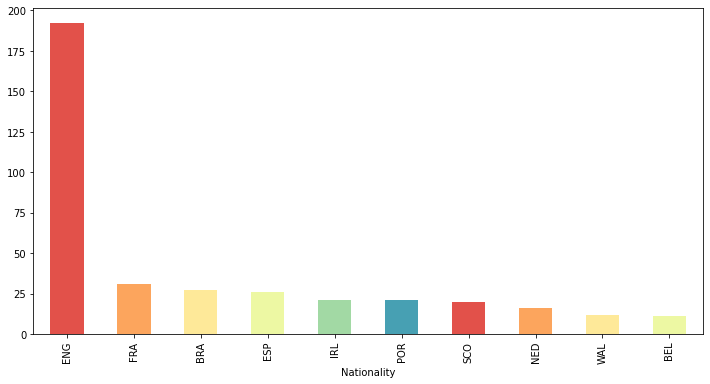

In [17]:
#Let's plot the above result.



Nationality_fig = Nationality.head(10)

Nationality_fig.plot(kind = "bar", figsize = (12, 6), color = sns.color_palette("Spectral"))




**Clubs with maximum players in their squad**

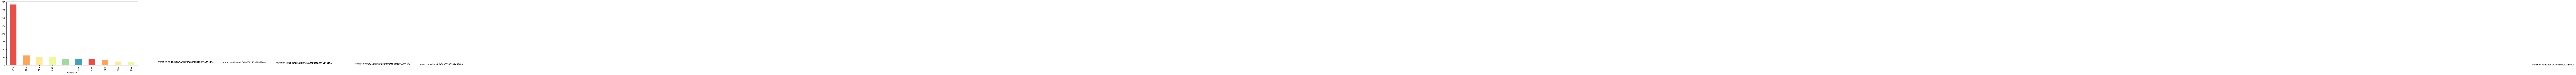

In [18]:
from logging.config import valid_ident
from multiprocessing.sharedctypes import Value


x = Nationality
y = Nationality_fig


Nationality_fig.plot(kind = "bar", figsize = (12, 6), color = sns.color_palette("Spectral"))

for index, value in enumerate(y):
    plt.text(value, index, str(Value))


plt.show()

<AxesSubplot:>

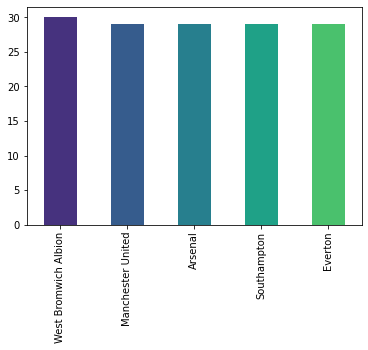

In [19]:
EPL_dataset["Club"].value_counts().nlargest(5).plot(kind = "bar", color = sns.color_palette("viridis"))

**Clubs with least players in their squad**

<AxesSubplot:>

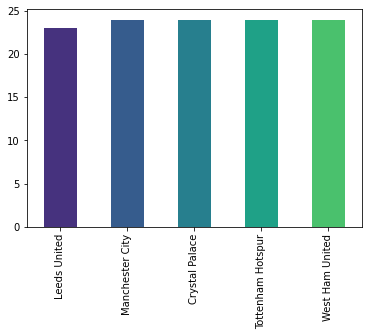

In [20]:
EPL_dataset["Club"].value_counts().nsmallest(5).plot(kind = "bar", color = sns.color_palette("viridis"))

**Players based on age group**

In [21]:
Under20 = EPL_dataset[EPL_dataset["Age" ] <=20]
age20_25 = EPL_dataset[(EPL_dataset["Age"] > 20) & (EPL_dataset["Age"] <=25)]
age25_30 = EPL_dataset[(EPL_dataset["Age"] > 25) & (EPL_dataset['Age'] <=30)]
Above30 = EPL_dataset[EPL_dataset['Age'] >30 ]

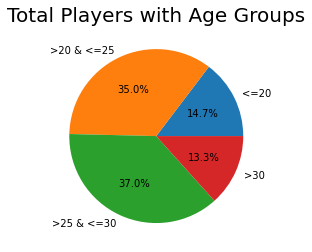

In [22]:
x = np.array([Under20["Name"].count(), age20_25["Name"].count(), age25_30["Name"].count(), Above30["Name"].count()])

mylabels = ["<=20", ">20 & <=25", ">25 & <=30", ">30"]

plt.title("Total Players with Age Groups", fontsize = 20)

plt.pie(x, labels = mylabels, autopct="%.1f%%")

plt.show()


Check if this has been updated in github